In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2


In [ ]:
def display(img ,cmap=None):
    fig=plt.figure(figsize=(12,10))
    ax=fig.add_subplot(111)
    ax.imshow(img,cmap)

In [ ]:
#1 READ 

img =cv2.imread('C:/Users/panindia/Desktop/Udemy/Computer-Vision-with-Python/DATA/pennies.jpg')


In [ ]:
#2 Blur

blur_img=cv2.medianBlur(img,35)

In [ ]:
#3 CONVERT TO GRAYSCALE 

gray_img=cv2.cvtColor(blur_img,cv2.COLOR_BGR2GRAY)

In [ ]:
#4 APPLY BINARY INV THRESHOLD ALONG WITH OTSU


ret,thres=cv2.threshold(gray_img,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

In [ ]:
#5 NOISE REMOVAL(OPTIONAL)


kernel=np.ones((3,3),np.int8)
noise_rem_img=cv2.morphologyEx(thres,cv2.MORPH_OPEN,kernel,iterations=2)



In [ ]:
#6 GRAB SURE BACKGROUND USING DILATE 

sure_bg=cv2.dilate(noise_rem_img,kernel,iterations=3)

In [ ]:
#7 GRAB SURE FOREGROUND USING DISTANCE TRANSFORM

sure_fg=cv2.distanceTransform(noise_rem_img,cv2.DIST_L2,5)
ret,thres=cv2.threshold(sure_fg,noise_rem_img.max()*0.7,255,0)

In [ ]:
sure_fg=np.uint8(sure_fg)

In [ ]:
#8 FIND THE UNKNOWN REGION
unknown=np.subtract(sure_bg,sure_fg)

In [ ]:
#9 LABELING THE MARKERS OF SURE FOREGROUD USING CONNECTED COMPONENTS 

ret,markers=cv2.connectedComponents(sure_fg)
markers=markers+1

markers[unknown==255]=0




In [ ]:
#10 APPLY WATERSHED 
x=cv2.watershed(blur_img,markers)


In [ ]:
#CONTOUR 
img,contours,hierachy=cv2.findContours(x,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
for i in range(len(contours)):
    if hierachy[0][i][3]==-1:
        cv2.drawContours(blur_img,contours,i,[255,255,0],20)
            


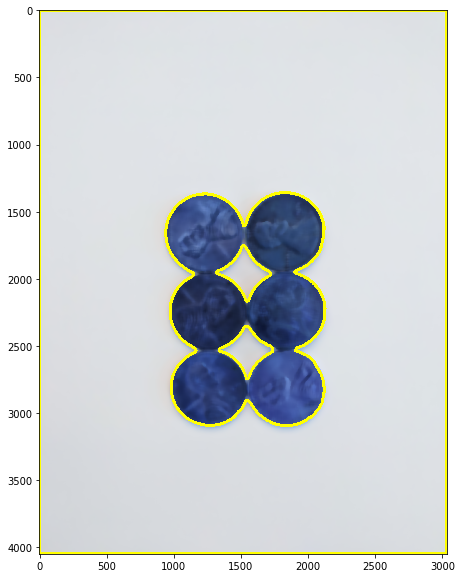

In [ ]:
display(blur_img)